In [36]:
import torch
import torchvision
import random

from PIL import Image
import numpy as np
from io import BytesIO
import requests
from torchvision import transforms as T

import matplotlib.pyplot as plt
import cv2
import datetime

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [18]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

In [46]:
date = str(datetime.date.today())

In [19]:
model.eval();

In [20]:
# We will now get a list of class names for this model, i will link the notebook ni the description.
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

In [21]:
def get_prediction(img, threshold=0.5):
  transform = T.Compose([T.ToTensor()])
  img = transform(img)
  pred = model([img]) # We have to pass in a list of images
  pred_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in list(pred[0]['labels'].numpy())] # If using GPU, you would have to add .cpu()
  pred_boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].detach().numpy())] # Bounding Boxes
  pred_score = list(pred[0]['scores'].detach().numpy())
  pred_t = [pred_score.index(x) for x in pred_score if x > threshold][-1]
  pred_box = pred_boxes[:pred_t+1]
  pred_class = pred_class[:pred_t+1]
  return pred_box, pred_class

In [61]:
def object_detection(img_path, threshold=0.5, rect_th=1, text_size=2, text_th=1, save=False, display=True):
    img = cv2.imread(img_path) # If Local

    boxes, pred_clas = get_prediction(img, threshold=threshold)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    for i in range(len(boxes)):
        r, g, b = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)) # Random Color
        cv2.rectangle(img, boxes[i][0], boxes[i][1], color=(r, g, b), thickness=rect_th) # Draw Rectangle with the coordinates
        cv2.putText(img, pred_clas[i], boxes[i][0], cv2.FONT_HERSHEY_SIMPLEX, text_size, (r, g, b), thickness=text_th)
    if display:
        plt.figure(figsize=(15, 15))
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        plt.show()
    if save:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        cv2.imwrite(f'output-{date}.png', img)

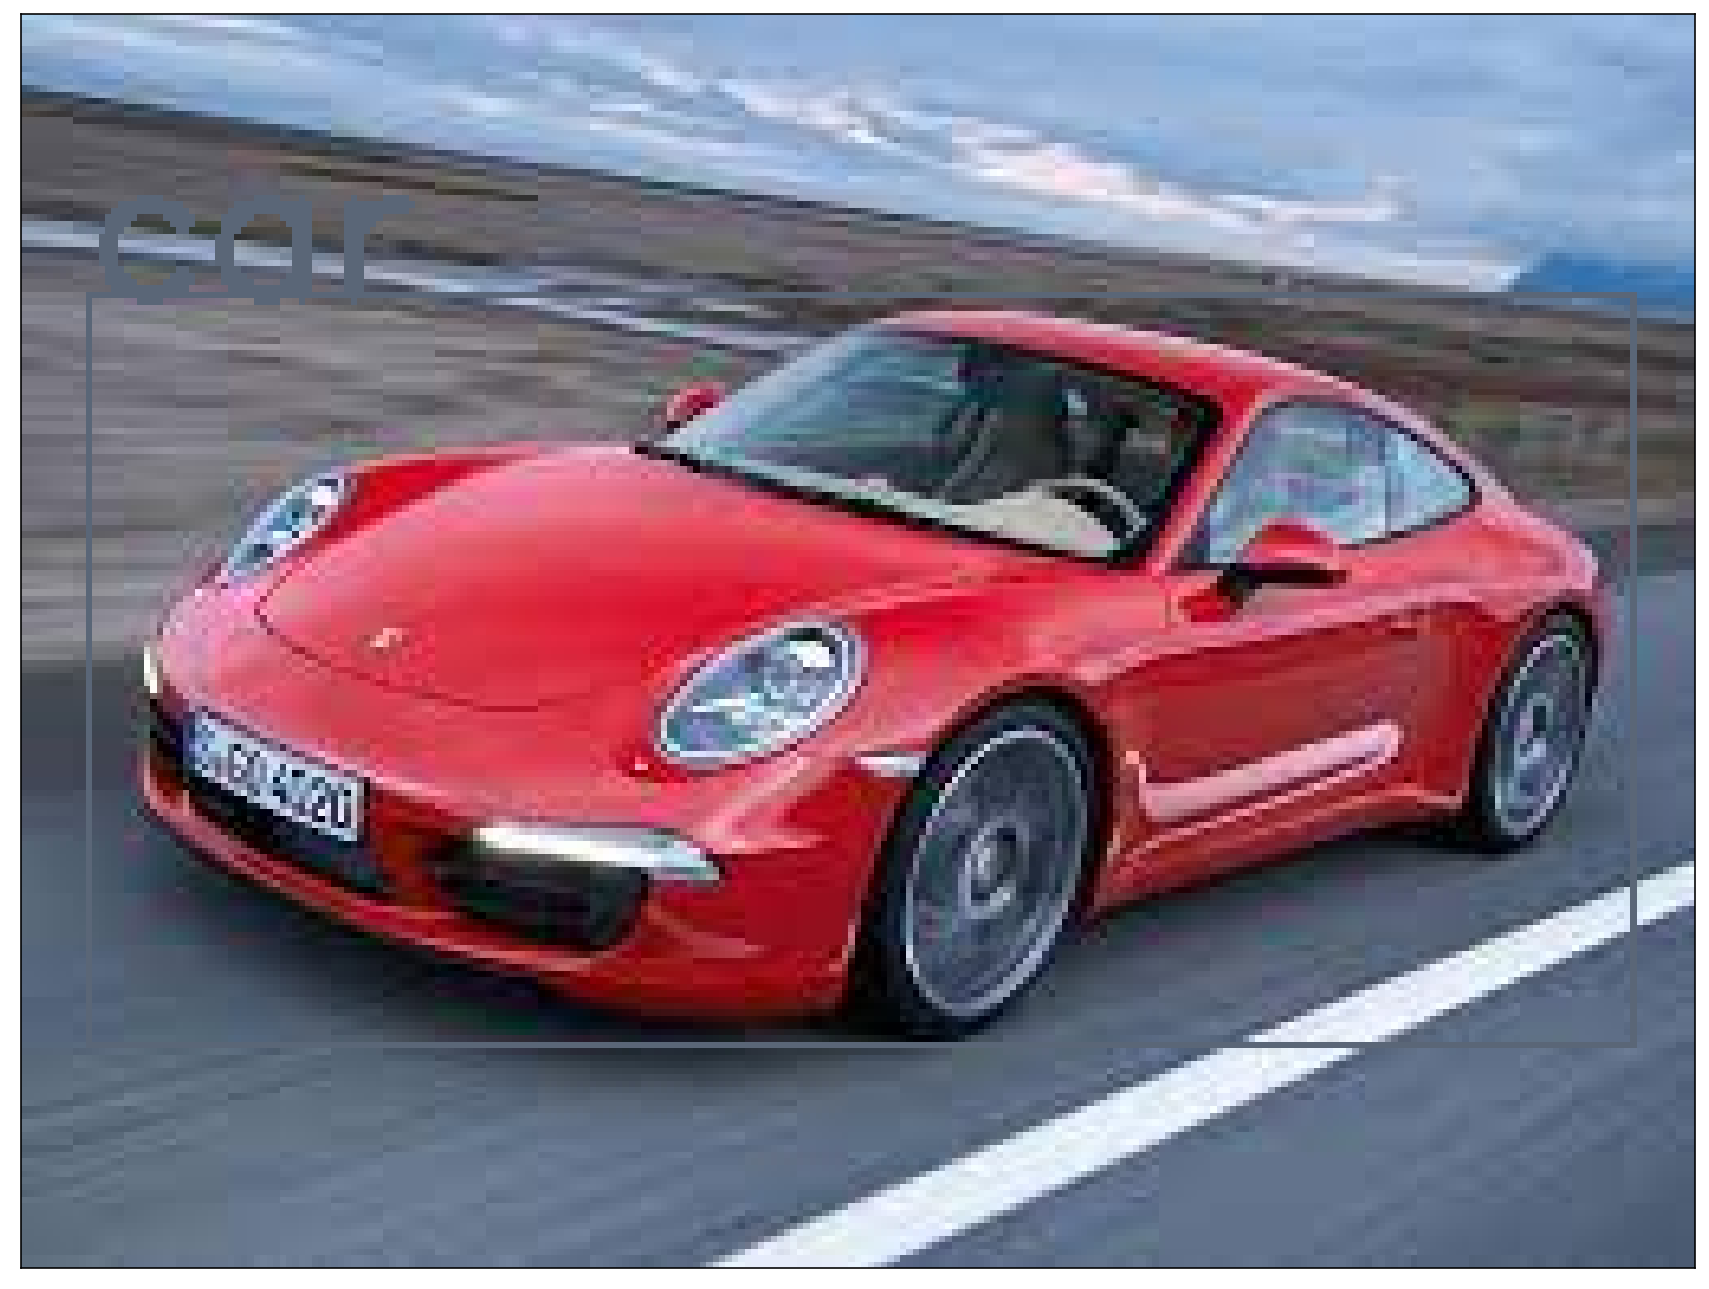

In [59]:
object_detection('./ref/cars_img_2.jfif', rect_th = 1, text_th=2, text_size = 1, save=True)

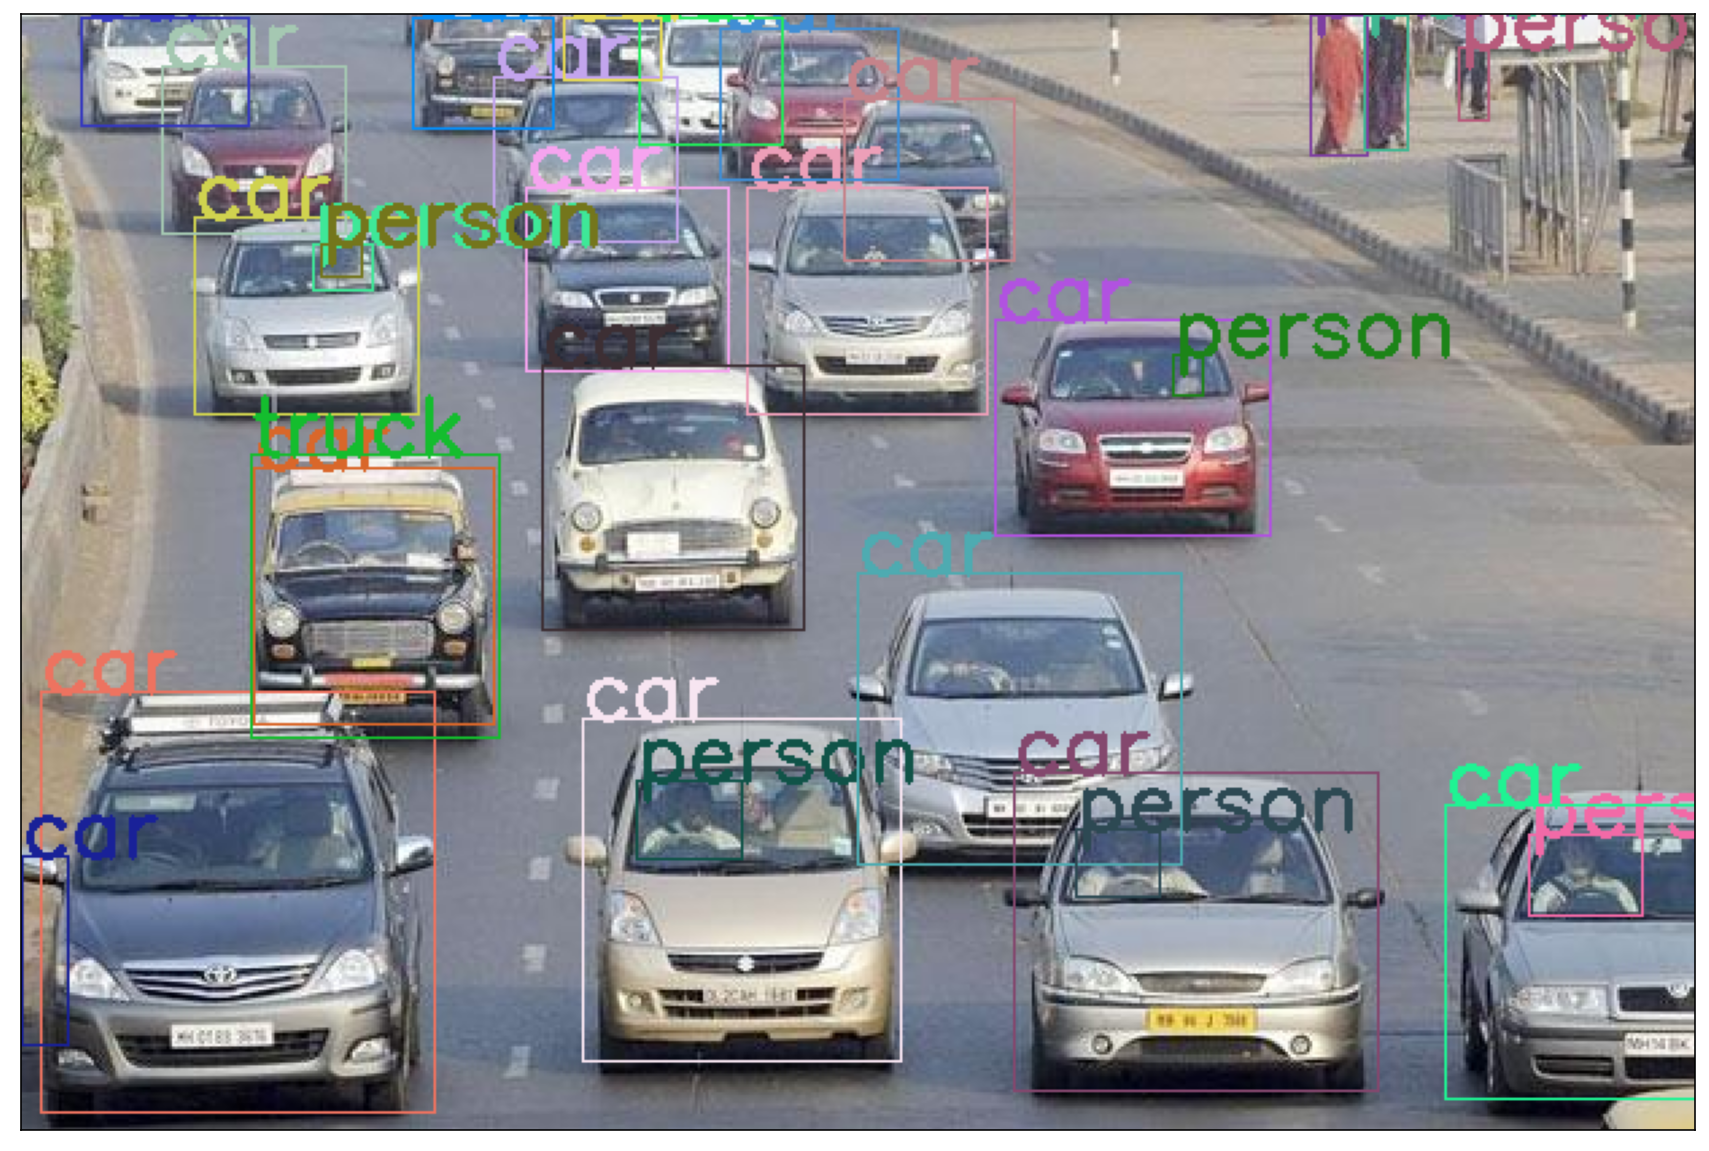

In [62]:
object_detection('./ref/cars_img_1.jpg', rect_th = 1, text_th=2, text_size = 1, save=True)

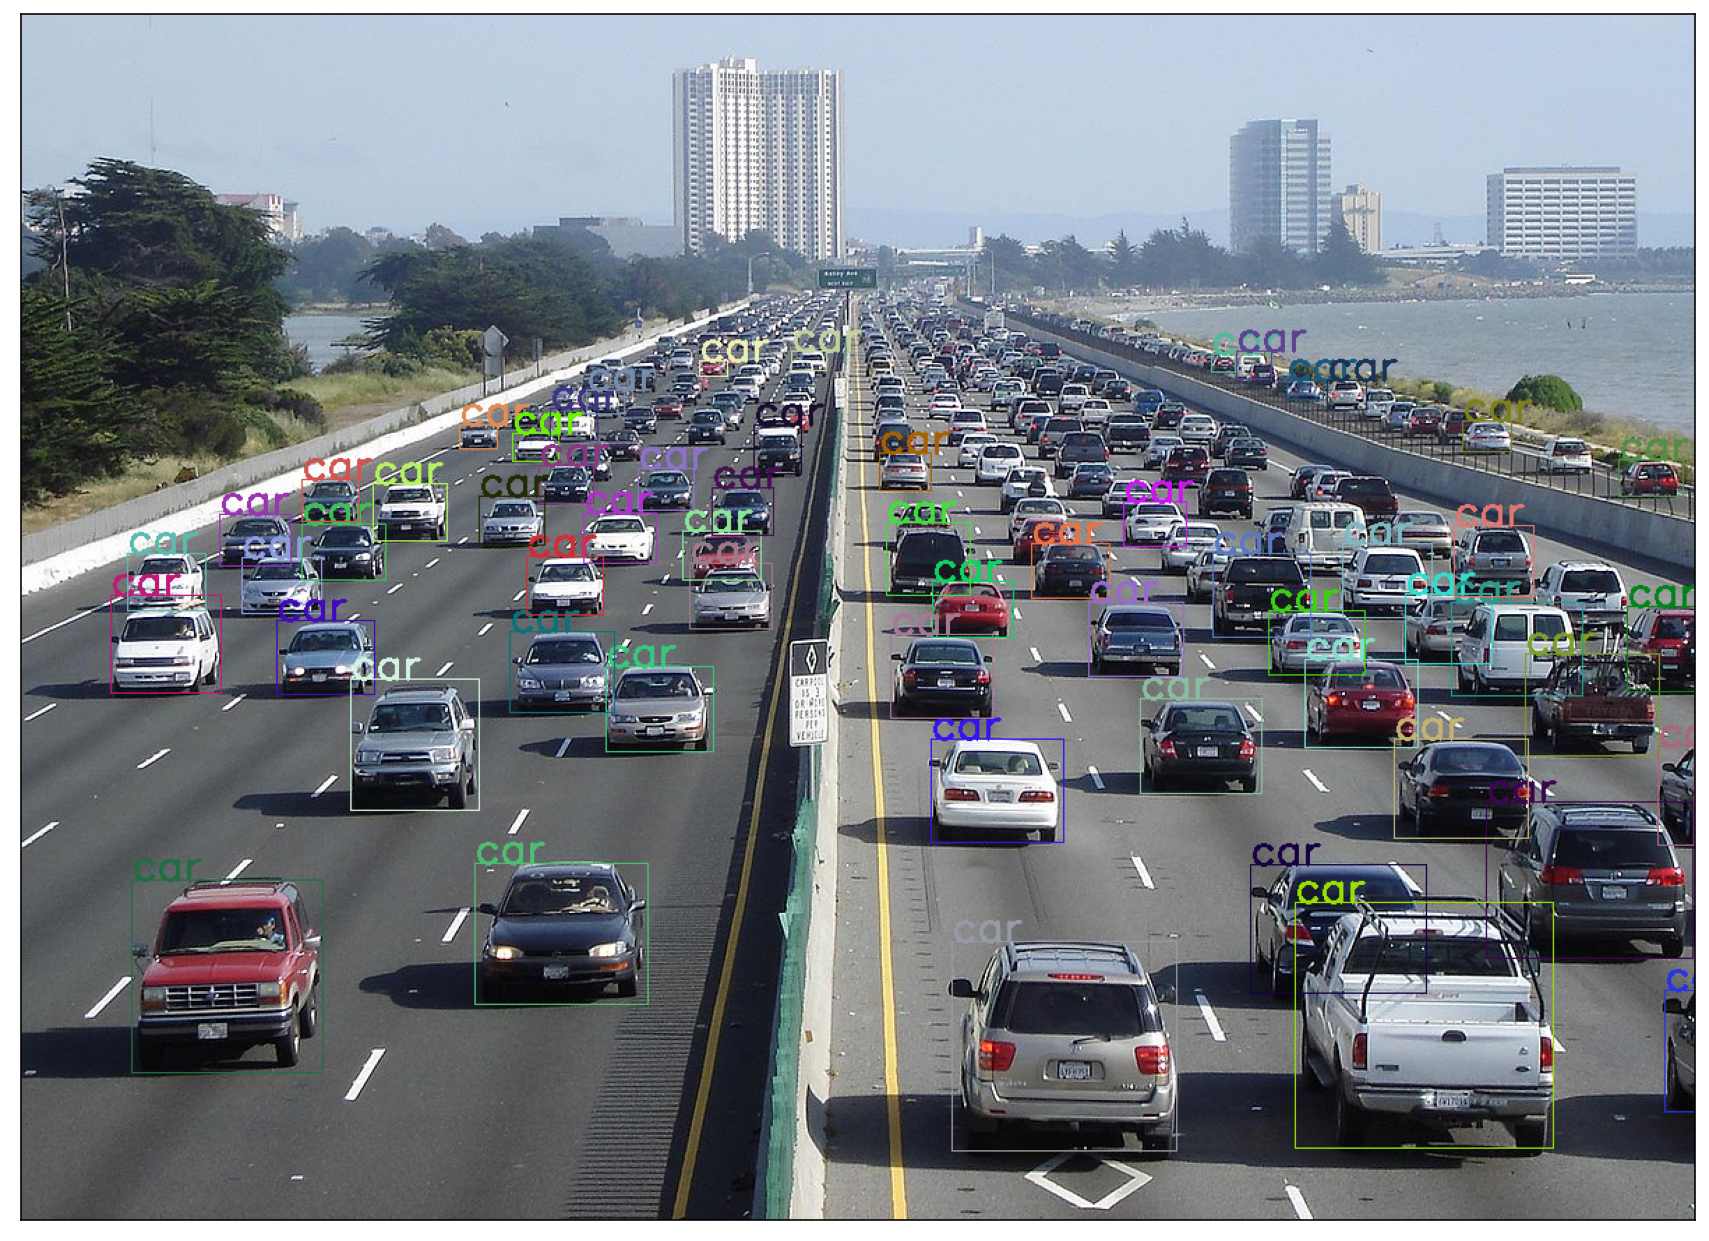

In [32]:
object_detection('./ref/cars_img_3.jpg', rect_th = 1, text_th=2, text_size = 1, save=True)